In [264]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob, os, random
from pathlib import Path
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

np.random.seed(0)
sns.set_style("darkgrid")

def my_covar(x, y):
    return my_mean(x * y) - my_mean(x) * my_mean(y)

def my_var(x):
    return np.nansum( (np.array(x) - my_mean(x)) ** 2) / len(x)
    
def my_mean(x):
    return np.nansum(x) / len(x)

def my_corr(x, y):
    numerator = my_covar(x, y)
    denom = np.sqrt(my_var(x)) * np.sqrt(my_var(y))
    return numerator / denom

def custom_r2(true, pred):
    rss = np.nansum((true - pred) ** 2)
    tss = np.nansum((true - my_mean(true)) ** 2)
    return 1 - (rss / tss)

def plot_price_over_time(df, symbol):
    fig, axs = plt.subplots(3, 1, figsize = (15, 9), sharex = True)
    df = df[df["symbol"] == symbol].sort_values(by = ["date"])
    print(list(df))
    axs[0].set_ylabel("Stock Price (USD)")
    axs[0].set_xlabel("Time")
    axs[0].plot(df.date, df.stockPrice, ls = "--", lw = 2, color = "black", alpha = 0.8, label = "Price")
    axs[0].legend()

    axs[1].plot(df.date, df.marketCapitalization)
    print(f"{my_corr(df.stockPrice, df.marketCapitalization) = }")
    plt.show()

def get_outlier_idxs(feature, feature_name):
    
    use_mad = True
    use_quantile = False
    ignore_pct = 0.01

    if(use_mad):
        magic_c = 0.6745
        cutoff_value = 8.0 
        mad = np.nanmedian(np.abs(feature - np.nanmedian(feature)))
        mi_feature = (magic_c * (feature - np.nanmedian(feature))) / mad
        outliers = np.where(np.abs(mi_feature) >= cutoff_value)[0]
        print(f"{feature_name} Found {len(outliers)} outliers out of {feature.shape[0]} -- {len(outliers) / feature.shape[0] * 100: .2f}%")
    

    elif(use_quantile):
        lower = np.nanquantile(feature, ignore_pct)
        upper = np.nanquantile(feature, 1 - ignore_pct) 
        outliers = np.where((feature >= upper) | (feature <= lower))[0]
        print(f"{feature_name} Found {len(outliers)} outliers out of {feature.shape[0]} -- {len(outliers) / feature.shape[0] * 100: .2f}%")

    return outliers
    
x = [123, 4, 1, 2 ,4, 2]
y = [1, 2, 3, 4, 5, 6]
x = np.array(x)
y = np.array(y)

# print(my_var(x))
# print(my_corr(x, y))

# print(np.corrcoef(x, y))
# print(r2_score(x, y))
# print(custom_r2(x, y))
# corr = covar(x, y) / std(x) * std(y)

In [265]:
df = pd.read_parquet("/Users/lselig/selig-fa/finance/.data/evs_ratios.parquet")
# df["year"] = pd.DatetimeIndex(df["date"]).year
# df = df[df.symbol.isin(["AAPL", "GOOGL", "MSFT", "GME", "A", "QQQ", "AMZN", "TSLA"])]
# df = df[df.year >= 2015]
df = df[(df.stockPrice >= 2) & (df.stockPrice <= 1000)]
remove_me = []
for col in list(df):
    num_na = df[col].isna().sum().sum()
    print(col, num_na)
    if(num_na > 30000):
        remove_me.append(col)

df = df.drop(columns = remove_me)
df = df.dropna()
print(df.shape)
# plt.scatter(df.stockPrice * df.numberOfShares, df.marketCapitalization)
# plt.show()

# plot_price_over_time(df, "MSFT")

meta_cols = ["year", "symbol", "date", "quarter", "cik"]
drop_me_experimental = ["priceEarningsToGrowthRatio", "numberOfShares", 
                        "quickRatio", "daysOfSalesOutstanding", 
                        "effectiveTaxRate", "freeCashFlowOperatingCashFlowRatio"]
df = df.drop(columns = meta_cols)
df = df.drop(columns = drop_me_experimental)
features = df
ignore_me = ["buySellRatio", "totalBought", "totalSold",
             "averageBought", "averageSold", "pPurchases",
             "sSales", "purchases", "sales"]
# ignore_me = ignore_me + ignore_me_experimental

symbol 0
date 0
stockPrice 0
numberOfShares 0
marketCapitalization 0
minusCashAndCashEquivalents 0
addTotalDebt 0
enterpriseValue 0
quarter 0
currentRatio 13145
quickRatio 13145
cashRatio 13145
daysOfSalesOutstanding 6394
daysOfInventoryOutstanding 43968
operatingCycle 44233
daysOfPayablesOutstanding 43968
cashConversionCycle 44233
grossProfitMargin 6394
operatingProfitMargin 6394
pretaxProfitMargin 6394
netProfitMargin 6394
effectiveTaxRate 5916
returnOnAssets 17
returnOnEquity 1793
returnOnCapitalEmployed 13153
netIncomePerEBT 5916
ebtPerEbit 27793
ebitPerRevenue 6394
debtRatio 17
debtEquityRatio 1793
longTermDebtToCapitalization 36222
totalDebtToCapitalization 74639
interestCoverage 49914
cashFlowToDebtRatio 34517
companyEquityMultiplier 1793
receivablesTurnover 14572
payablesTurnover 23699
inventoryTurnover 77509
fixedAssetTurnover 13090
assetTurnover 17
operatingCashFlowPerShare 489
freeCashFlowPerShare 489
cashPerShare 489
payoutRatio 438
operatingCashFlowSalesRatio 6394
freeCash

stockPrice Found 2925 outliers out of 115414 --  2.53%
[   523    524    525 ... 115161 115162 115163]
marketCapitalization Found 13246 outliers out of 115414 --  11.48%
[   128    131    132 ... 115162 115163 115164]
minusCashAndCashEquivalents Found 12107 outliers out of 115414 --  10.49%
[   102    106    136 ... 115162 115163 115164]
addTotalDebt Found 17780 outliers out of 115414 --  15.41%
[    80     81     96 ... 115099 115100 115101]
enterpriseValue Found 13303 outliers out of 115414 --  11.53%
[   132    133    134 ... 115162 115163 115164]
currentRatio Found 2909 outliers out of 115414 --  2.52%
[   144    182    372 ... 115247 115248 115250]
cashRatio Found 4720 outliers out of 115414 --  4.09%
[   144    145    146 ... 115254 115313 115316]
grossProfitMargin Found 449 outliers out of 115414 --  0.39%
[  1040   1041   1042   1043   1044   1045   1046   2545   4391   4413
   4527   5420   6002   6006   6355   6706   7292   7578   7580   7583
   9456   9457   9458   9459   95

/var/folders/xd/70hsmb4x1798qcyzb8hw9_n40000gp/T/ipykernel_4532/2694415930.py:56: RuntimeWarning: divide by zero encountered in divide
  mi_feature = (magic_c * (feature - np.nanmedian(feature))) / mad
/var/folders/xd/70hsmb4x1798qcyzb8hw9_n40000gp/T/ipykernel_4532/2694415930.py:56: RuntimeWarning: invalid value encountered in divide
  mi_feature = (magic_c * (feature - np.nanmedian(feature))) / mad


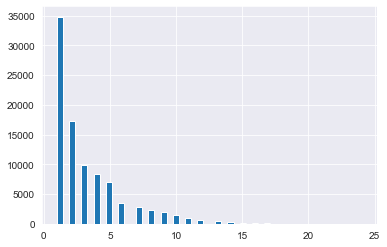

True 13
True 7
True 6
True 14
True 11
True 10
True 11
True 11
True 11
True 8
True 5
True 5
True 6
True 13
True 12
True 12
True 10
True 9
True 12
True 10
True 9
True 9
True 9
True 9
True 11
True 12
True 14
True 11
True 11
True 11
True 11
True 11
True 11
True 11
True 11
True 11
True 11
True 17
True 12
True 11
True 11
True 11
True 11
True 10
True 11
True 12
True 13
True 12
True 14
True 13
True 12
True 11
True 11
True 11
True 6
True 3
True 3
True 4
True 3
True 4
True 5
True 3
True 3
True 3
True 18
True 15
True 6
True 14
True 7
True 5
True 5
True 5
True 5
True 5
True 4
True 4
True 3
True 3
True 4
True 4
True 4
True 5
True 5
True 3
True 5
True 5
True 4
True 5
True 6
True 6
True 4
True 7
True 6
True 7
True 6
True 7
True 5
True 6
True 6
True 6
True 15
True 4
True 5
True 5
True 9
True 9
True 8
True 5
True 10
True 10
True 11
True 10
True 8
True 4
True 4
True 6
True 4
True 16
True 13
True 14
True 12
True 10
True 9
True 3
True 5
True 5
True 5
True 5
True 5
True 5
True 5
True 5
True 5
True 5
True 5

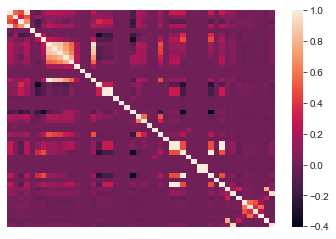

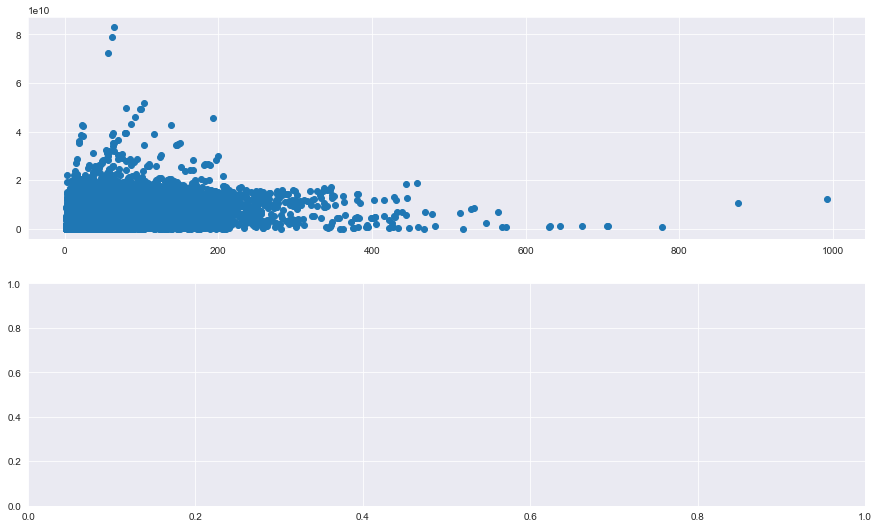

In [266]:
outlier_idxs = []
majority_outliers = {}
for i, feature in enumerate(features):
    # print(f"{feature = } -- {np.corrcoef(features[feature].values, labels)[0, 1]:.4f}")
    if(feature not in ignore_me):
        result = get_outlier_idxs(features[feature].values, feature)
        for idx in result:
            if(idx not in majority_outliers):
                majority_outliers[idx] = 1
            else:
                majority_outliers[idx] += 1

        print(result)
        outlier_idxs.append(result)

lives = 3
remove_me = []
plt.hist(majority_outliers.values(), bins = 50)
plt.show()
for key in majority_outliers:
    print(majority_outliers[key] >= lives, majority_outliers[key])
    if(majority_outliers[key] >= lives):
        remove_me.append(key)
        
# remove_me = set().union(*outlier_idxs)
print(f"Killing {len(remove_me)} rows out of {len(features)}")
bad_idx = list(remove_me)

labels = df["stockPrice"].values
df = df.reset_index(drop = True)
bad_df = df.index.isin(bad_idx)
df = df[~bad_df]

print(df.shape)
labels = df.stockPrice
features = df.drop(columns = ["stockPrice"])
corr = features.corr()
sns.heatmap(corr, annot = False, xticklabels=False, yticklabels=False)
plt.show()
fig, axs = plt.subplots(2, 1, figsize = (15, 9))
axs[0].scatter(df.stockPrice, df.marketCapitalization)
# %matplotlib widget
# plt.hist(df.stockPrice)


feature = 'marketCapitalization' -- 0.4399


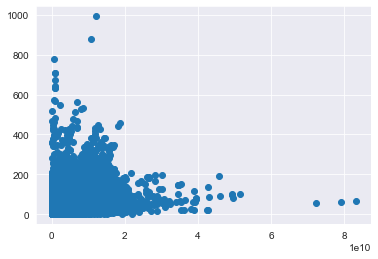

feature = 'minusCashAndCashEquivalents' -- 0.1595


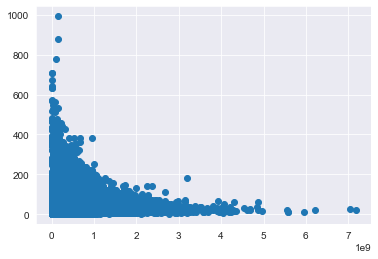

feature = 'addTotalDebt' -- 0.1316


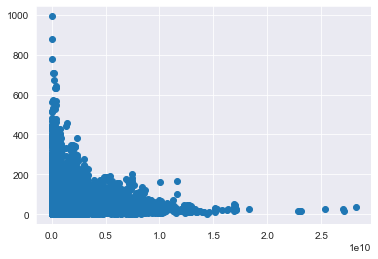

feature = 'enterpriseValue' -- 0.4057


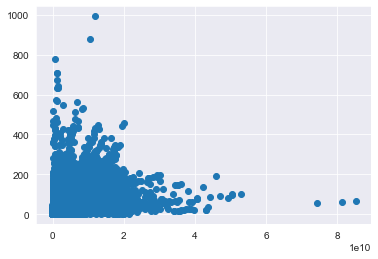

feature = 'currentRatio' -- -0.0020


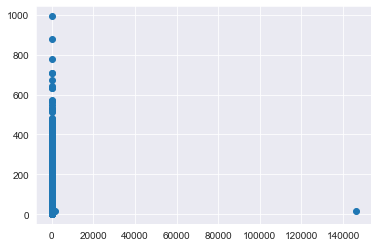

feature = 'cashRatio' -- -0.0296


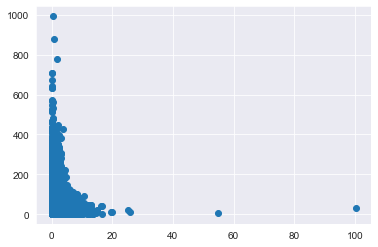

feature = 'grossProfitMargin' -- 0.0587


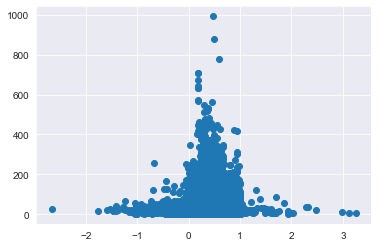

feature = 'operatingProfitMargin' -- 0.1961


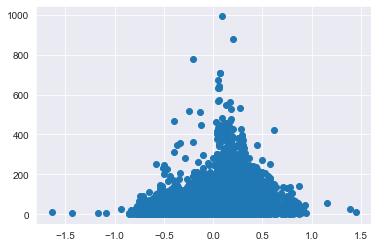

feature = 'pretaxProfitMargin' -- 0.1885


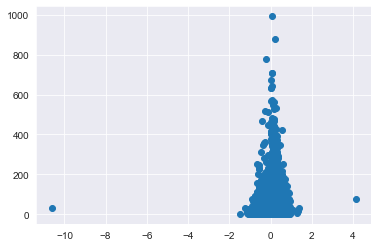

feature = 'netProfitMargin' -- 0.1852


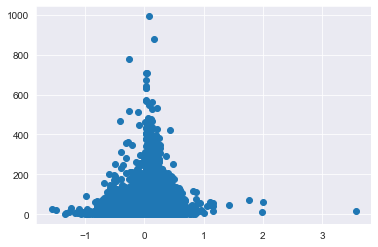

feature = 'returnOnAssets' -- 0.1783


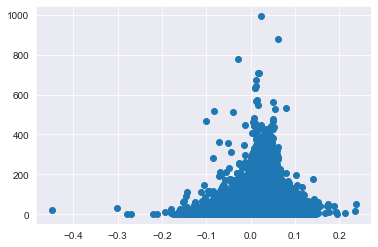

feature = 'returnOnEquity' -- 0.1567


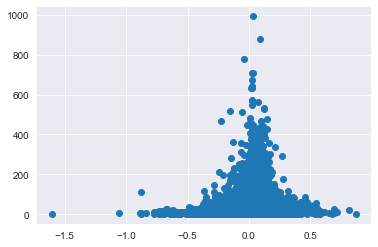

feature = 'returnOnCapitalEmployed' -- 0.0408


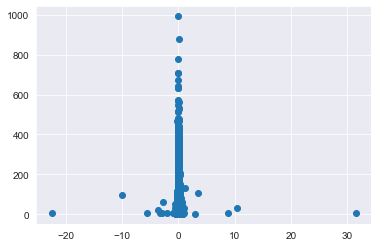

feature = 'netIncomePerEBT' -- -0.0033


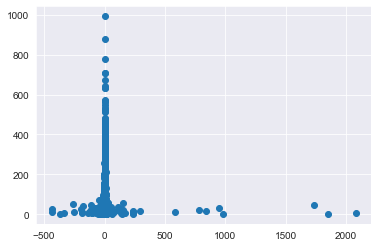

feature = 'ebtPerEbit' -- 0.0016


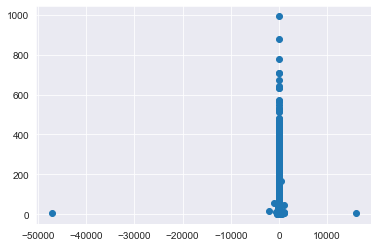

feature = 'ebitPerRevenue' -- 0.1962


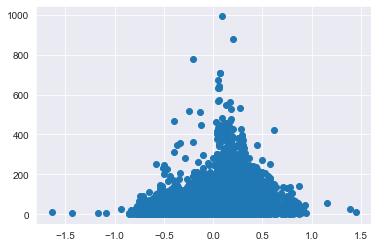

feature = 'debtRatio' -- 0.0080


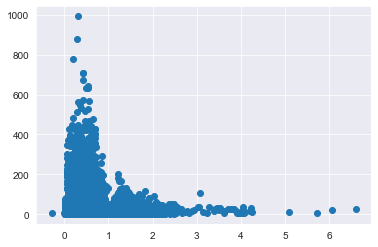

feature = 'debtEquityRatio' -- 0.0014


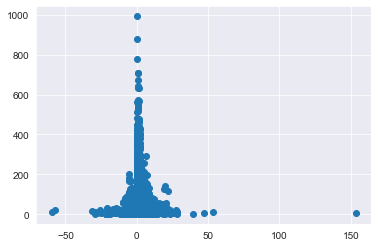

feature = 'companyEquityMultiplier' -- 0.0004


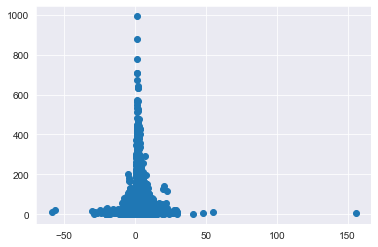

feature = 'receivablesTurnover' -- -0.0020


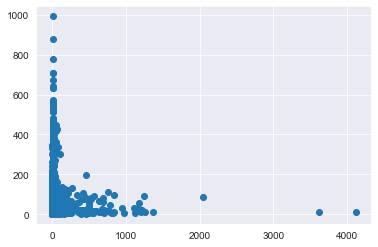

feature = 'payablesTurnover' -- 0.0040


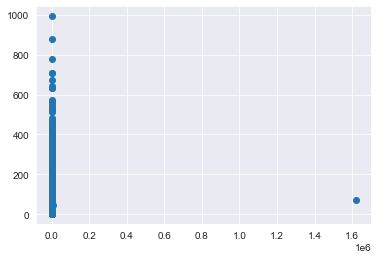

feature = 'fixedAssetTurnover' -- -0.0072


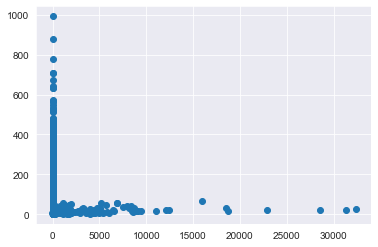

feature = 'assetTurnover' -- -0.0633


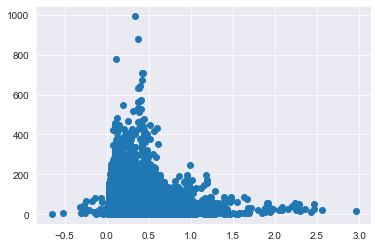

feature = 'operatingCashFlowPerShare' -- 0.4044


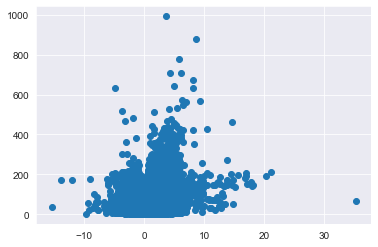

feature = 'freeCashFlowPerShare' -- 0.1611


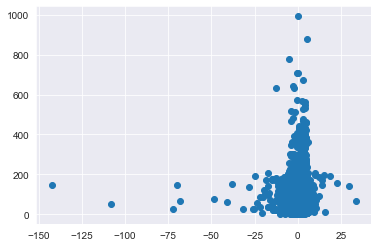

feature = 'cashPerShare' -- 0.0493


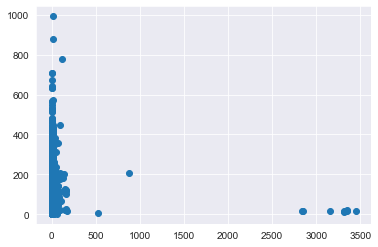

feature = 'payoutRatio' -- 0.0107


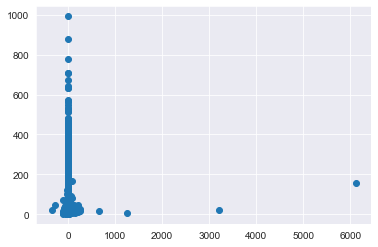

feature = 'operatingCashFlowSalesRatio' -- 0.1187


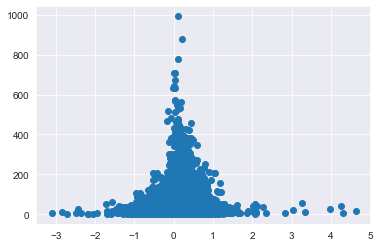

feature = 'capitalExpenditureCoverageRatio' -- 0.0043


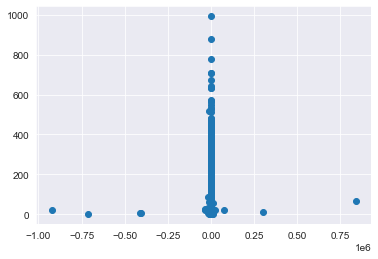

feature = 'priceBookValueRatio' -- 0.2735


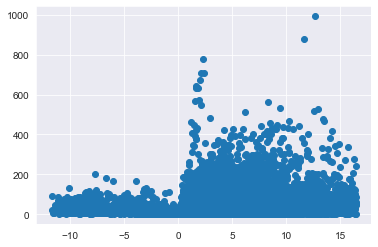

feature = 'priceToBookRatio' -- 0.2735


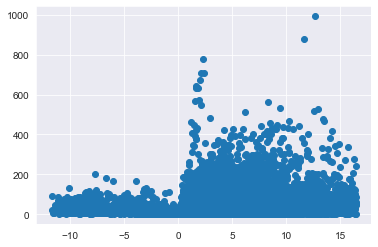

feature = 'priceToSalesRatio' -- 0.2504


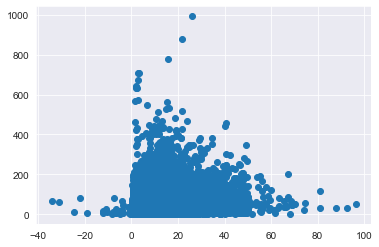

feature = 'priceEarningsRatio' -- 0.0032


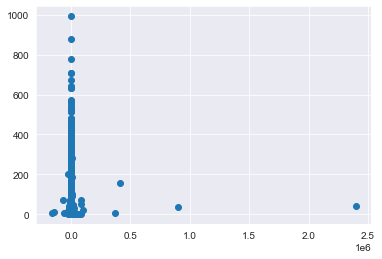

feature = 'priceToFreeCashFlowsRatio' -- 0.0003


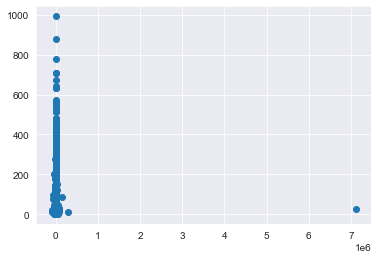

feature = 'priceToOperatingCashFlowsRatio' -- -0.0008


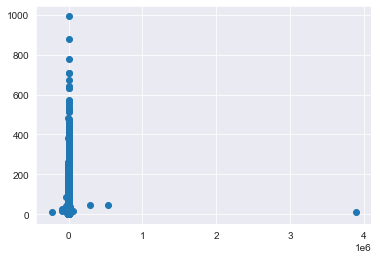

feature = 'priceCashFlowRatio' -- -0.0008


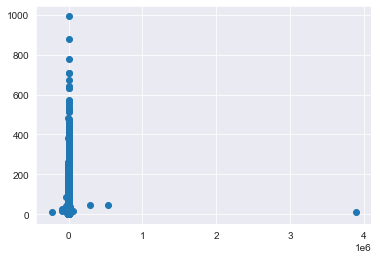

feature = 'priceSalesRatio' -- 0.2504


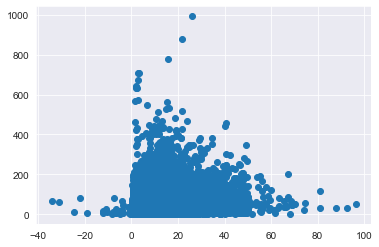

feature = 'enterpriseValueMultiple' -- 0.0061


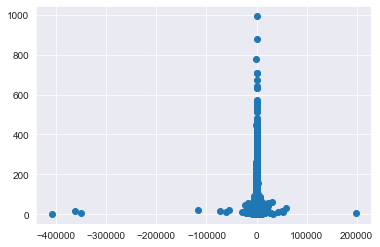

feature = 'priceFairValue' -- 0.2735


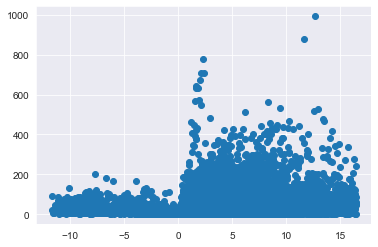

feature = 'purchases' -- 0.0492


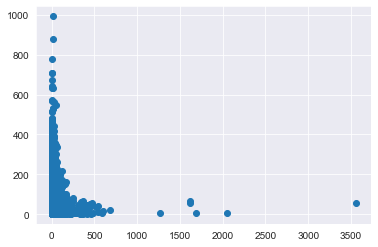

feature = 'sales' -- 0.0674


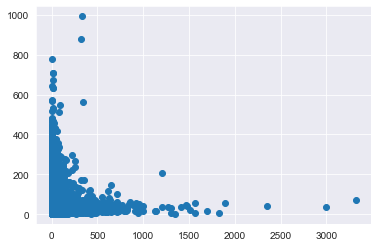

feature = 'buySellRatio' -- -0.0122


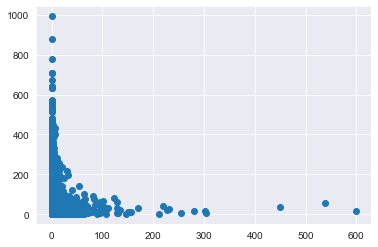

feature = 'totalBought' -- -0.0162


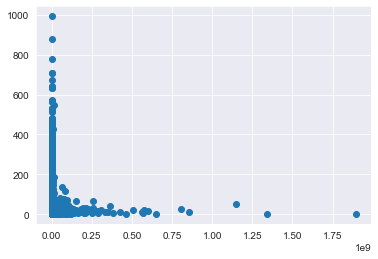

feature = 'totalSold' -- -0.0127


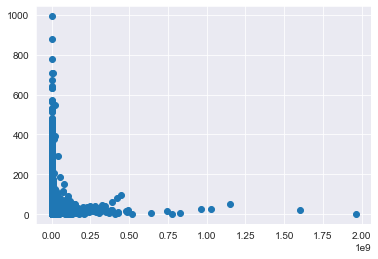

feature = 'averageBought' -- -0.0092


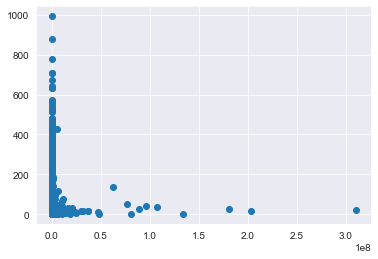

feature = 'averageSold' -- -0.0059


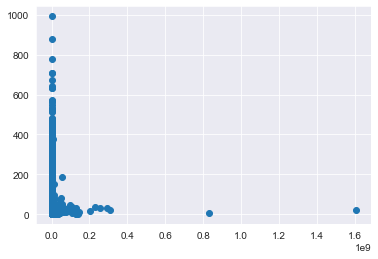

feature = 'pPurchases' -- -0.0201


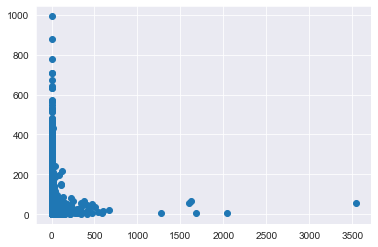

feature = 'sSales' -- 0.0395


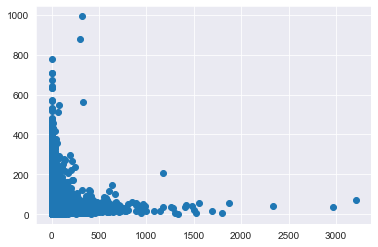

In [267]:

for i, feature in enumerate(features):
    print(f"{feature = } -- {np.corrcoef(features[feature].values, labels)[0, 1]:.4f}")
    plt.scatter(features[feature], labels)
    plt.show()
    # if(feature not in ignore_me):
    #     result = get_outlier_idxs(features[feature].values, feature)
    #     print(result)

In [268]:
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size = 0.8)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# print(y_train[:5])
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(y_test[:20].values)

print(y_pred[:20])

my_r2 = r2_score(y_test, y_pred)
my_mae = mean_absolute_error(y_test, y_pred)
my_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
my_mape = np.sqrt(mean_absolute_percentage_error(y_test, y_pred))
print(f"{my_r2 = }")
print(f"{my_mae = }")
print(f"{my_rmse = }")
print(f"{my_mape = }")

(60182, 48) (15046, 48) (60182,) (15046,)
[ 12.54        6.84      136.8399963  25.870001   42.9300003  13.2600002
  25.5699997 145.7400055  18.1900005  31.19       39.9300003  30.3099995
  11.         39.7299995  11.74       21.4699993  22.24       22.3099995
   6.577778   21.639999 ]
[27.50270932 33.11196058 77.47139356 34.95693382 58.39649631 51.22930734
 16.41233912 40.61990027 25.72628946 23.64890642 37.95690705 28.84805704
 18.3300047  47.17768781  6.10501134 19.80776182 29.19562158 42.82200667
 11.5054193  16.4288131 ]
my_r2 = 0.35628103146295886
my_mae = 15.447087417444733
my_rmse = 28.498416583073322
my_mape = 0.9411540794851792


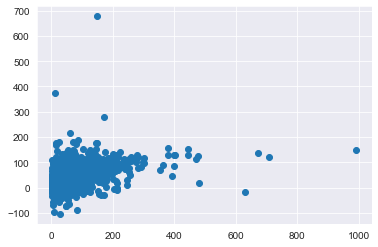

In [271]:
plt.close()
%matplotlib inline
plt.hist2d(y_test, y_pred, bins = 400)
plt.show()